In [18]:
import cv2 
import numpy as np
import PIL
import pickle

In [2]:
# Contornos da face, contornos da orelha, contornos dos olhos, contornos da sombrancelha, contornos da boca, contornos do nariz
def anime_countours(f):
    
    # ABRINDO IMAGEM
    im = cv2.imread(f,0)
    
    # BINARIZAÇÃO COM THRESHHOLD
    im2 = np.full(im.shape,255, dtype = np.uint8)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j]<255:
                im2[i][j] = 0
    
    # FINDING COUNTOURS
    contours, hierarchy = cv2.findContours(im2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    """
    face_contours = contours[4]
    left_ear = contours[3]
    right_ear = contours[2]
    mouth = contours[5]
    nose = contours[6]
    right_eye = contours[7]
    left_eye = contours[10]
    right_eyebrow = contours[13]
    left_eyebrow = contours[14]
    """
    return contours
    # (4,3,2,5,6,7,10,13,14)
    #return face_contours, left_ear, right_ear, mouth, nose, right_eye, left_eye, right_eyebrow, left_eyebrow
    
    
    
    

In [3]:
def find_measures(contours):
    
    resp = []
    
    for i in [4,3,2,5,6,7,10,13,14]:     
        x,y,w,h = cv2.boundingRect(contours[i])
        resp.append((x,y,w,h))
    
    return resp


In [21]:
def save_contours(fname):
    im = cv2.imread(fname,0)
    resp = anime_countours(fname)
    rect_measures = find_measures(resp)
    contourz = [resp[i] for i in  [4,3,2,5,6,7,10,13,14]]
    pickle.dump(rect_measures ,open(fname.replace(".png", "")+ "_rect.rect","wb"))
    pickle.dump(contourz,open(fname.replace(".png", "")+ "_cont.contour","wb"))

In [25]:
save_contours("4.png")

In [4]:
fname = '4.png'
# it works well on images 1-4
im = cv2.imread(fname,0)
resp = anime_countours(fname)
for i in [4,3,2,5,6,7,10,13,14]:
    x,y,w,h = cv2.boundingRect(resp[i])
    im = cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
    #im = cv2.drawContours(im, resp, i, (0,255,0), 3)

In [19]:
contourz = [resp[i] for i in  [4,3,2,5,6,7,10,13,14]]

In [20]:
contourz

[array([[[380, 178]],
 
        [[379, 179]],
 
        [[378, 179]],
 
        [[377, 179]],
 
        [[376, 179]],
 
        [[375, 179]],
 
        [[374, 179]],
 
        [[373, 179]],
 
        [[372, 179]],
 
        [[371, 179]],
 
        [[370, 179]],
 
        [[369, 179]],
 
        [[368, 180]],
 
        [[367, 180]],
 
        [[366, 180]],
 
        [[365, 180]],
 
        [[364, 180]],
 
        [[363, 181]],
 
        [[362, 181]],
 
        [[361, 181]],
 
        [[360, 181]],
 
        [[359, 181]],
 
        [[358, 182]],
 
        [[357, 182]],
 
        [[356, 182]],
 
        [[355, 183]],
 
        [[354, 183]],
 
        [[353, 183]],
 
        [[352, 184]],
 
        [[351, 184]],
 
        [[350, 184]],
 
        [[349, 185]],
 
        [[348, 185]],
 
        [[347, 185]],
 
        [[346, 186]],
 
        [[345, 186]],
 
        [[344, 187]],
 
        [[343, 187]],
 
        [[342, 188]],
 
        [[341, 188]],
 
        [[340, 189]],
 
        [[339, 1

In [17]:
find_measures(resp)

[(307, 178, 156, 180),
 (297, 270, 24, 46),
 (449, 270, 24, 46),
 (372, 332, 26, 4),
 (383, 311, 4, 7),
 (407, 267, 44, 44),
 (320, 267, 44, 44),
 (404, 248, 45, 11),
 (321, 248, 45, 11)]

In [ ]:
perimeter = cv2.arcLength(cnt,True)

In [15]:
resp[2]

array([[[467, 270]],

       [[466, 271]],

       [[465, 272]],

       [[465, 273]],

       [[464, 274]],

       [[463, 275]],

       [[463, 276]],

       [[462, 277]],

       [[462, 278]],

       [[462, 279]],

       [[462, 280]],

       [[461, 281]],

       [[461, 282]],

       [[461, 283]],

       [[460, 284]],

       [[460, 285]],

       [[460, 286]],

       [[460, 287]],

       [[459, 288]],

       [[459, 289]],

       [[458, 290]],

       [[458, 291]],

       [[458, 292]],

       [[457, 293]],

       [[457, 294]],

       [[457, 295]],

       [[456, 296]],

       [[456, 297]],

       [[456, 298]],

       [[455, 299]],

       [[455, 300]],

       [[454, 301]],

       [[454, 302]],

       [[454, 303]],

       [[453, 304]],

       [[453, 305]],

       [[453, 306]],

       [[452, 307]],

       [[452, 308]],

       [[451, 309]],

       [[451, 310]],

       [[451, 311]],

       [[450, 312]],

       [[450, 313]],

       [[449, 314]],

       [[4

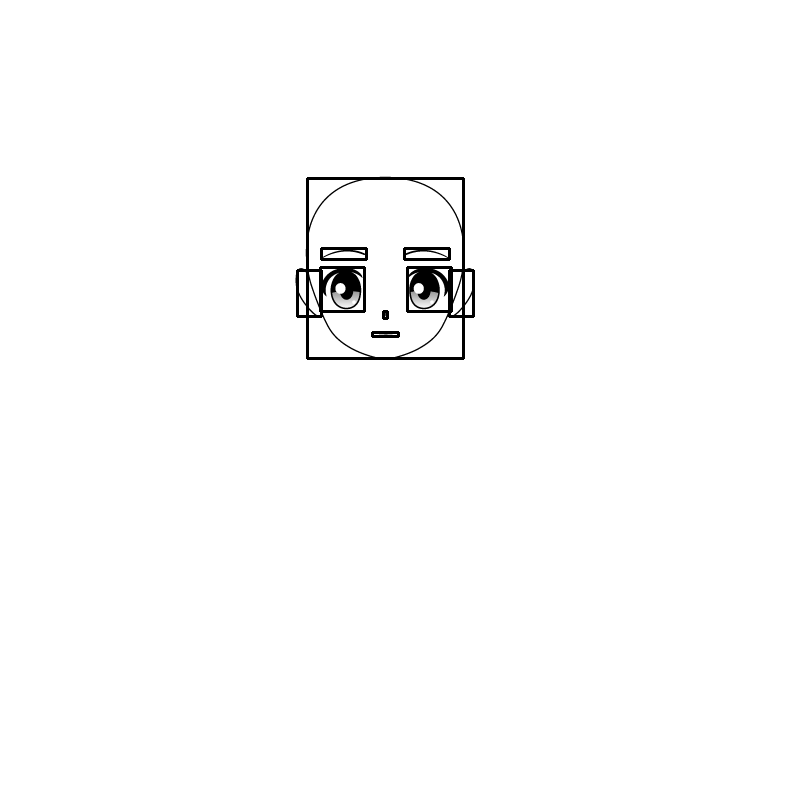

In [5]:
PIL.Image.fromarray(im)